# Import libraries and datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# We mount drive for importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import dataset from drive
creditcard_df = pd.read_csv('/content/drive/MyDrive/Data Science/Proyectos/marketing-project/Marketing_data.csv')

# Visualize dataset

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.info()
# 18 features with 8950 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()
# Mean balance is $1564
# Purchases average is around $1000
# Average purchases frequency is around 0.5
# Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Let's see who made one off purchase of $40761
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# Let's see who made cash advance of $47137
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# Data Cleaning and Exploration

<Axes: >

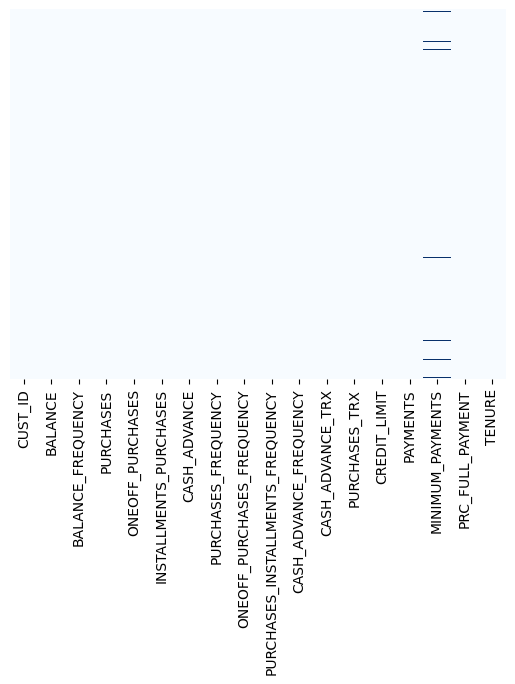

In [ ]:
# Let´s check if is it any missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
# There is missing data in MINIMUM_PAYMENTS

In [ ]:
# Let´s count how many missing data have MINIMUM_PAYMENTS
creditcard_df.isnull().sum()
# CREDIT_LIMIT also has missing data

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Let´s fill the missing elements of MINIMUM_PAYMENT wit the mean
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Let´s fill the missing elements of CREDIT_LIMIT with the mean
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

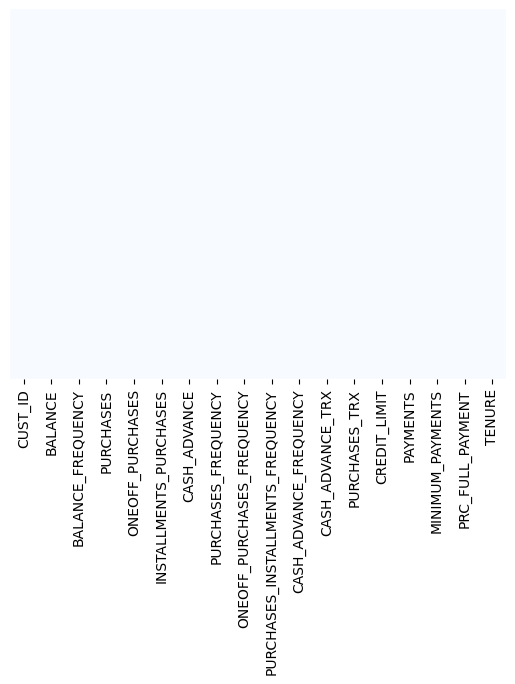

In [ ]:
 # Let´s comprobe if the dataset still have null values
 sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
 # Is everything ok with this.

In [ ]:
# Let´s check if it is any duplicated value
creditcard_df.duplicated().sum()
# Everything ok

0

In [ ]:
# Let's drop CUST_ID because it doesn´t work in this project
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
n = len(creditcard_df.columns)
n
# Now the total columns are 17 instead of 18

17

# Exploratory Data Analysis (EDA)

<ipython-input-17-5d94154bb2ac>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-17-5d94154bb2ac>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[cre

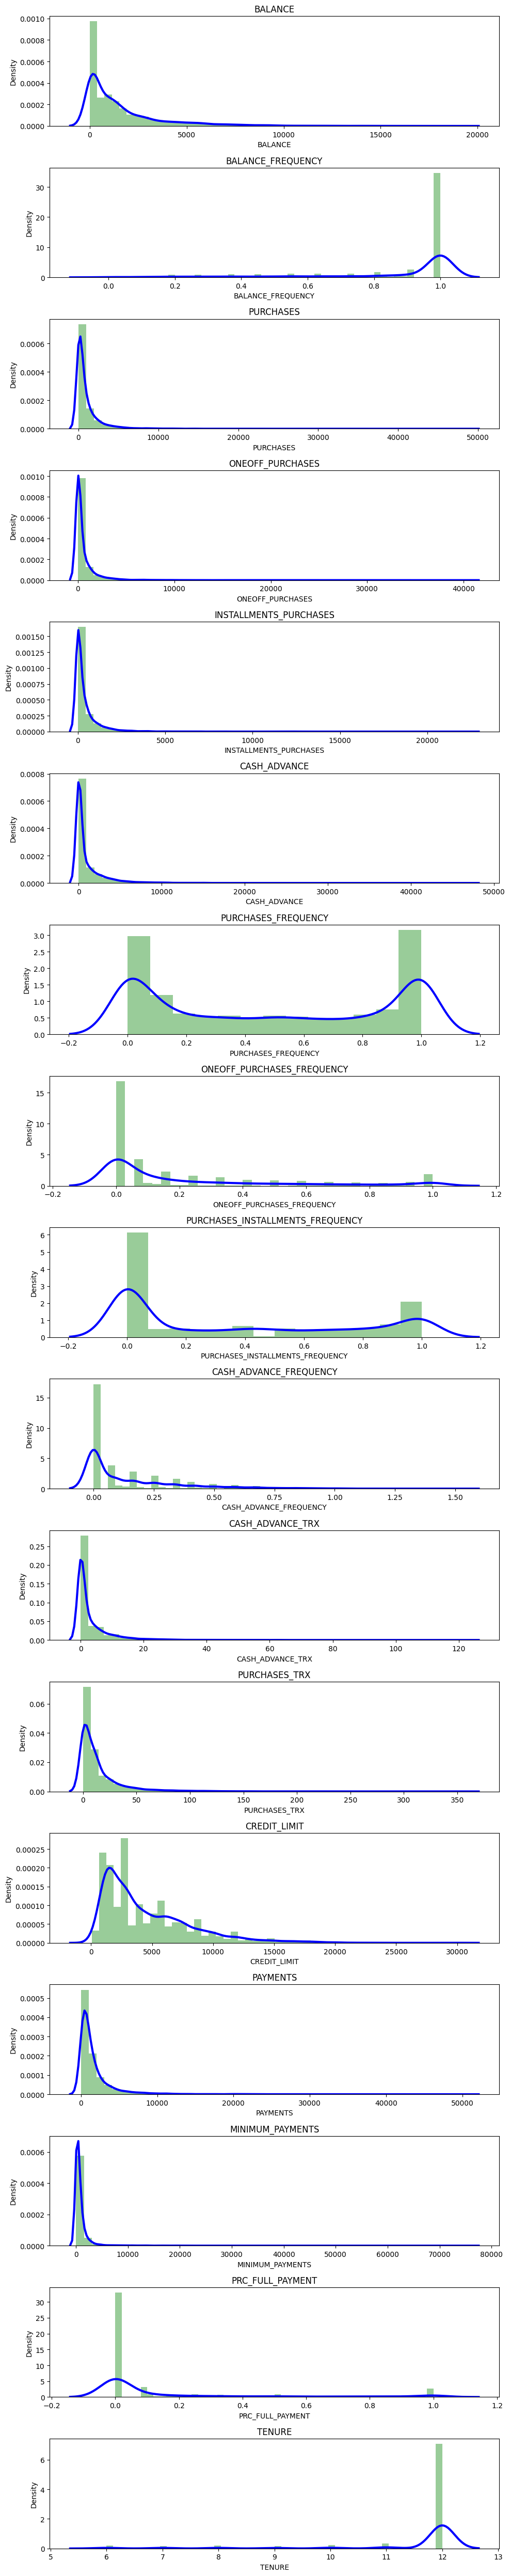

In [ ]:
# Let´s use KDE Plot  for visualizating the probability density of each variable.

# BALANCE_FRECUENCY for most customers is updated frequently ~1
# In PURCHASES_FREQUENCY are two different group of customers
# In ONEOFF_PURCHASES_FREQUENCY and PURCHASES_INSTALLMENT_FREQUENCY most users don´t make theese frecuently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# CREDIT_LIMIT average is around $4500
# Most customers are near 11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

<Axes: >

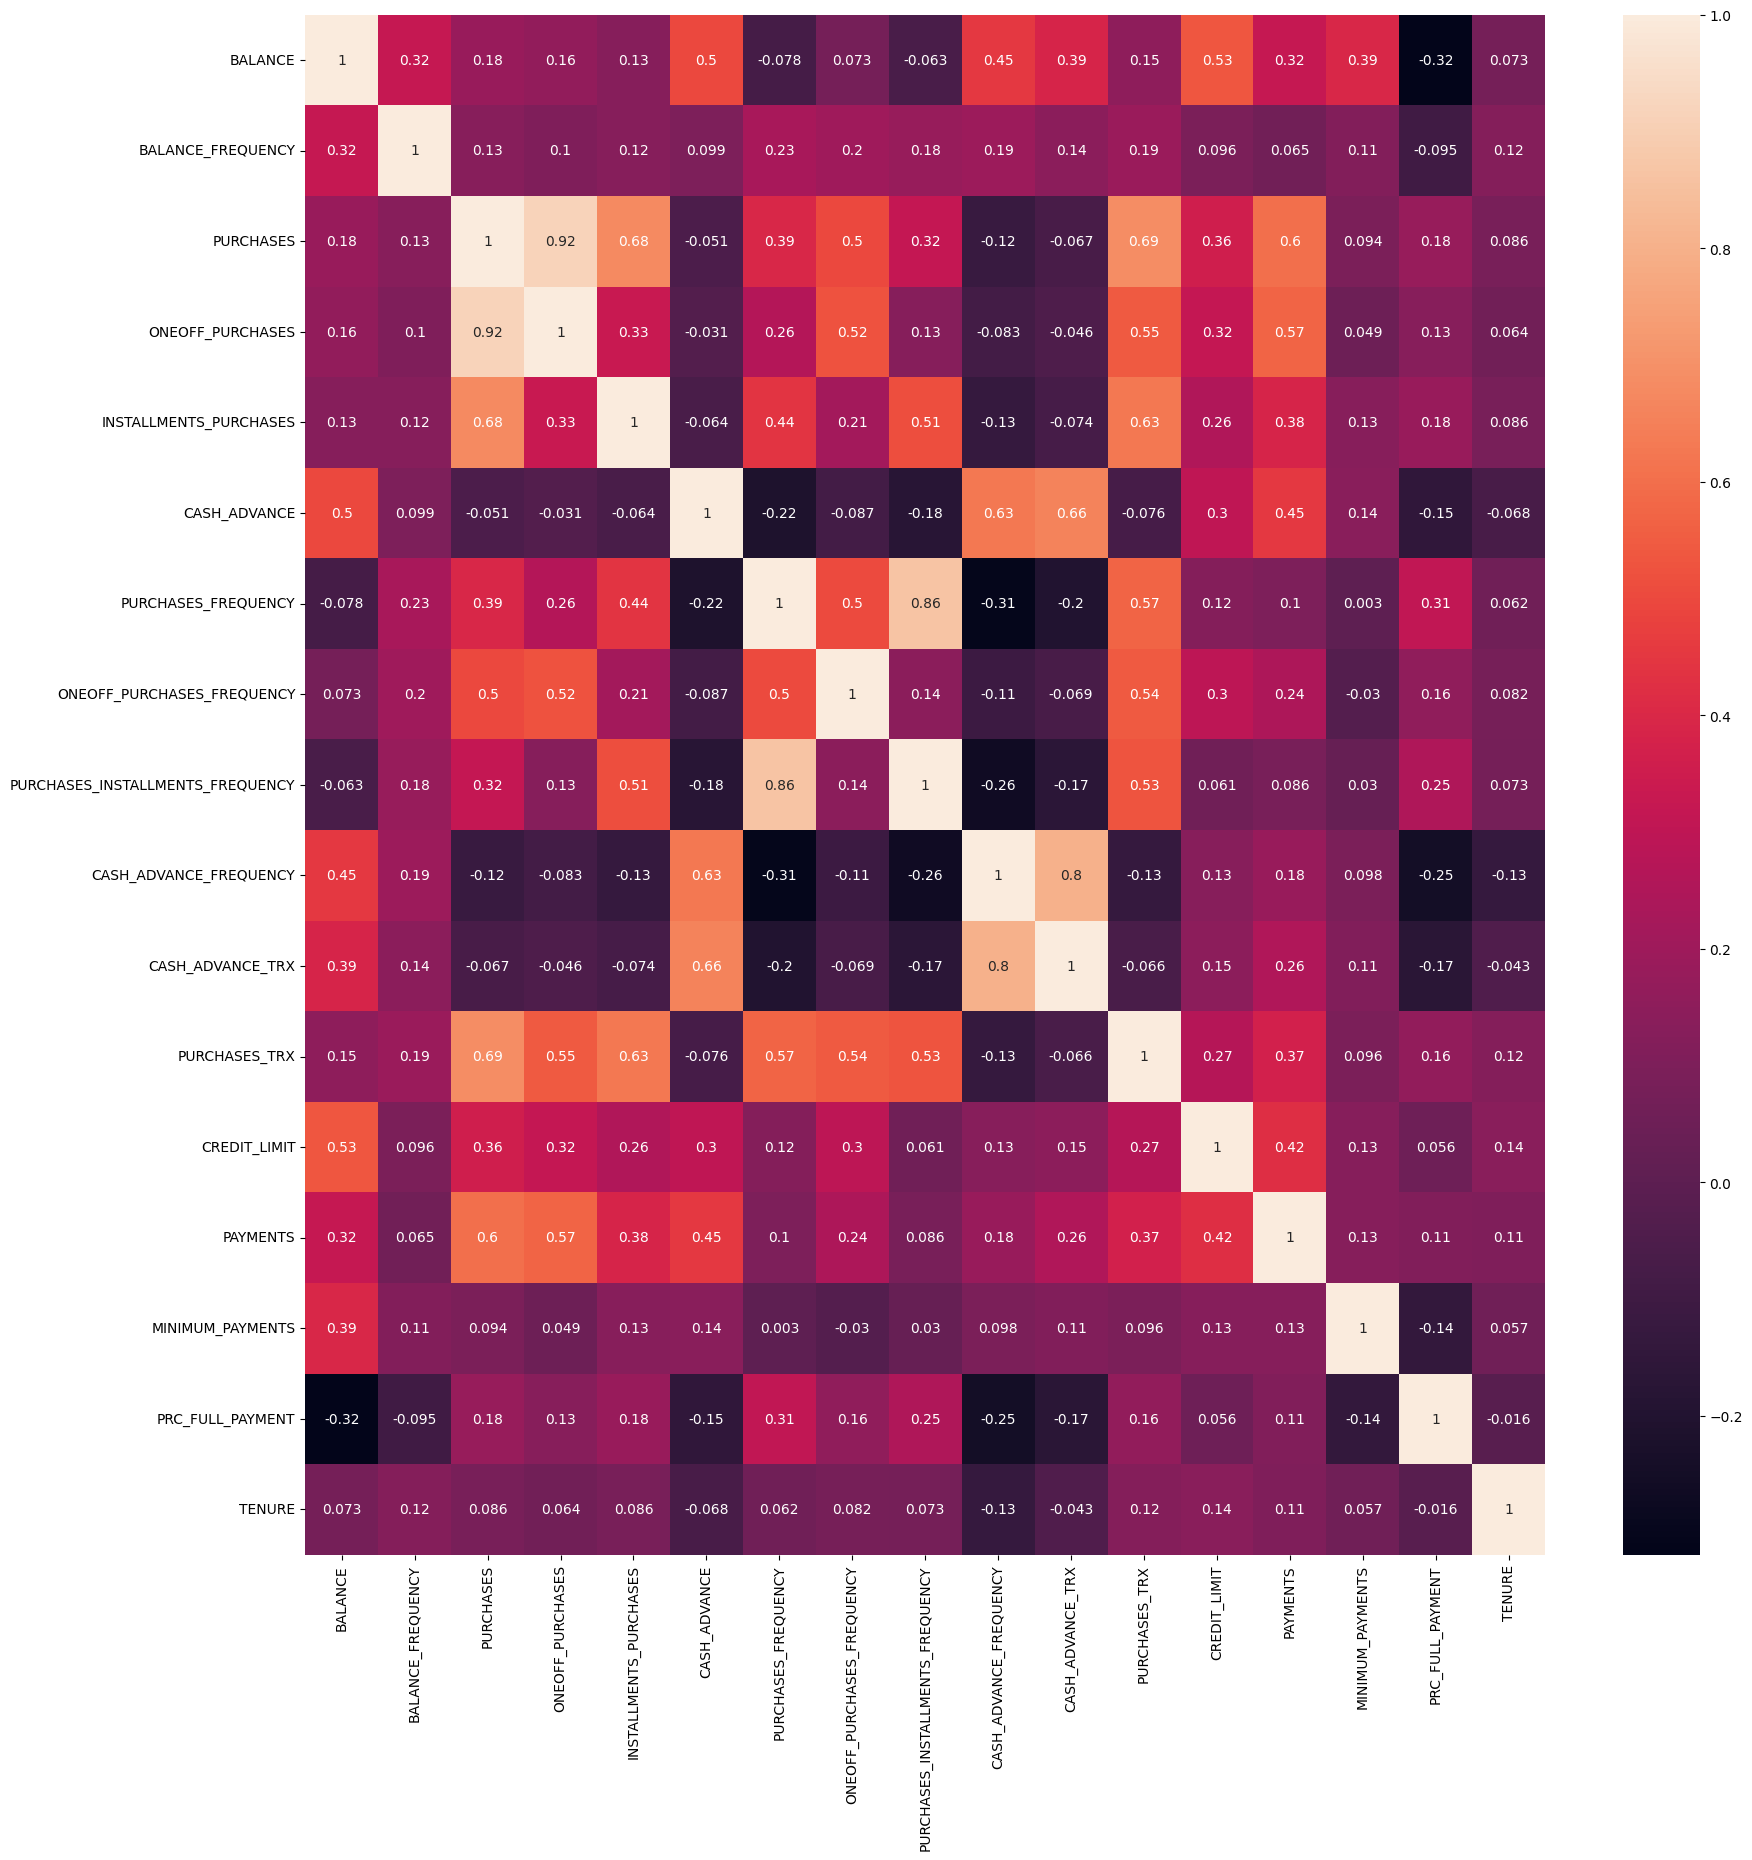

In [ ]:
correlations = creditcard_df.corr() # numeric_only is if any feature is a text value
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
# PURCHASES has high correlation between ONE_OFF_PURCHASES_FRECUENCY, INSTALLMENT_PURCHASES, PURCHASES_TRX (transactions), CREDIT_LIMIT and PAYMENTS.
# Strong Positive Correlation between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENT_FREQUENCY
# Positive correlation between CREDIT_LIMIT with BALANCE and PAYMENTS

# Definition of Numbers of Clusters

In [ ]:
# Scaled of dataset
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape
# Dataset still being the same

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

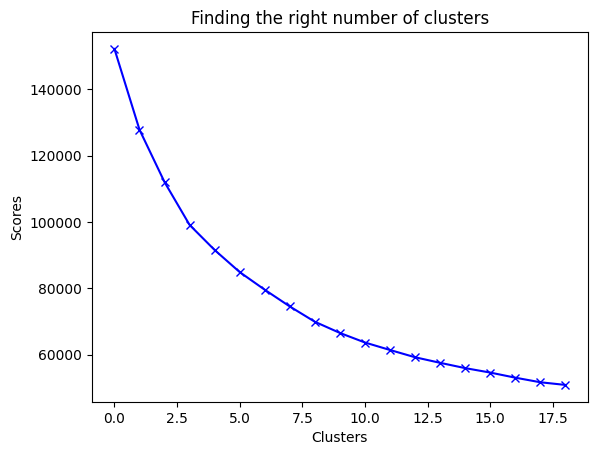

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

# After 8th cluster, values don´t reduce linearly.
# Final number of clusters: 8

# K-Means

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_
# scaled dataset is the used for the method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.333924,-0.345996,-0.288199,-0.214424,-0.287144,0.067515,-0.203348,-0.286554,-0.225256,0.309069,0.000876,-0.387867,-0.563134,-0.392745,-0.209087,0.013378,-3.200691
1,-0.700918,-2.143735,-0.310468,-0.235060,-0.302135,-0.319880,-0.555387,-0.443244,-0.439618,-0.520753,-0.376148,-0.419400,-0.172441,-0.191642,-0.256427,0.284813,0.200105
2,0.008011,0.403794,-0.356343,-0.241289,-0.399168,-0.099914,-0.849405,-0.393312,-0.751860,0.094305,-0.035236,-0.480600,-0.306547,-0.253050,-0.012702,-0.455999,0.274240
3,1.044635,0.467595,2.475182,1.820048,2.508863,-0.155349,1.162779,1.563685,1.267221,-0.278814,-0.145341,3.113081,1.290382,1.436111,0.555879,0.246267,0.337720
4,-0.362134,0.332550,-0.034215,-0.242676,0.364746,-0.362101,0.996850,-0.384533,1.209959,-0.472437,-0.359512,0.191143,-0.260710,-0.214045,-0.029857,0.316954,0.255791
5,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
6,1.672804,0.395311,-0.222610,-0.159762,-0.232916,1.992907,-0.478910,-0.211898,-0.417791,1.910047,1.914806,-0.270538,1.015747,0.799212,0.546717,-0.394679,0.072107
7,-0.137673,0.399710,0.536062,0.664787,0.045997,-0.332236,0.979679,1.904438,0.169496,-0.414641,-0.332543,0.616149,0.429727,0.140926,-0.159252,0.449387,0.268609


In [ ]:
# Each column will have a center for each cluster
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# Optimal classification (clusters) ?
# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges. With lowest balance ($104) and cash advance ($303). The most careful with their money. Percentage of full payment = 23%
# Second customers cluster (Revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16 or more) and low full payment (3%).
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and the biggest spenders
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years or aproximately), low balance.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.811233e+06,1.065672,8.288253e+05,3.931966e+05,1.373263e+05,2.350620e+06,0.654397,0.237353,0.473696,0.174564,25.460499,140.703986,8.902355e+06,1.727634e+06,8.793003e+05,0.199818,21.198228
1,2.213067e+05,0.964788,7.271734e+05,3.363451e+05,1.250678e+05,6.470104e+05,0.597690,0.223408,0.439838,0.141335,7.902260,121.221642,1.407436e+07,3.412969e+06,6.221965e+05,0.223038,27.288813
2,3.292595e+06,1.107748,5.177670e+05,3.191862e+05,4.572008e+04,1.614337e+06,0.550329,0.227852,0.390520,0.165964,23.778720,83.410402,1.229907e+07,2.898341e+06,1.945874e+06,0.159665,27.421583
3,7.783548e+06,1.111328,1.344282e+07,5.998003e+06,2.423722e+06,1.370555e+06,0.874453,0.402014,0.709428,0.151023,18.651080,2303.707576,3.343924e+07,1.705428e+07,5.033856e+06,0.219741,27.535271
4,1.689016e+06,1.103750,1.988185e+06,3.153652e+05,6.704007e+05,4.613421e+05,0.847725,0.228633,0.700384,0.143270,8.676988,498.435672,1.290585e+07,3.225221e+06,1.852705e+06,0.225788,27.388542
5,1.114036e+07,1.102015,5.786918e+07,3.485964e+07,5.501455e+06,3.122146e+06,0.848621,0.443699,0.646080,0.146484,19.627064,3079.983862,5.952887e+07,7.862450e+07,7.462584e+06,0.297253,27.469330
6,1.050496e+07,1.107272,1.128216e+06,5.437849e+05,1.816705e+05,1.081773e+07,0.610009,0.243997,0.443285,0.238674,114.593326,213.193968,2.980362e+07,1.171678e+07,4.984099e+06,0.164910,27.059578
7,2.661446e+06,1.107519,4.591328e+06,2.815352e+06,4.097481e+05,5.926761e+05,0.844959,0.432339,0.536046,0.145584,9.932951,761.019050,2.204587e+07,6.200038e+06,1.149956e+06,0.237117,27.411498


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 4, 6, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Each label for each record
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


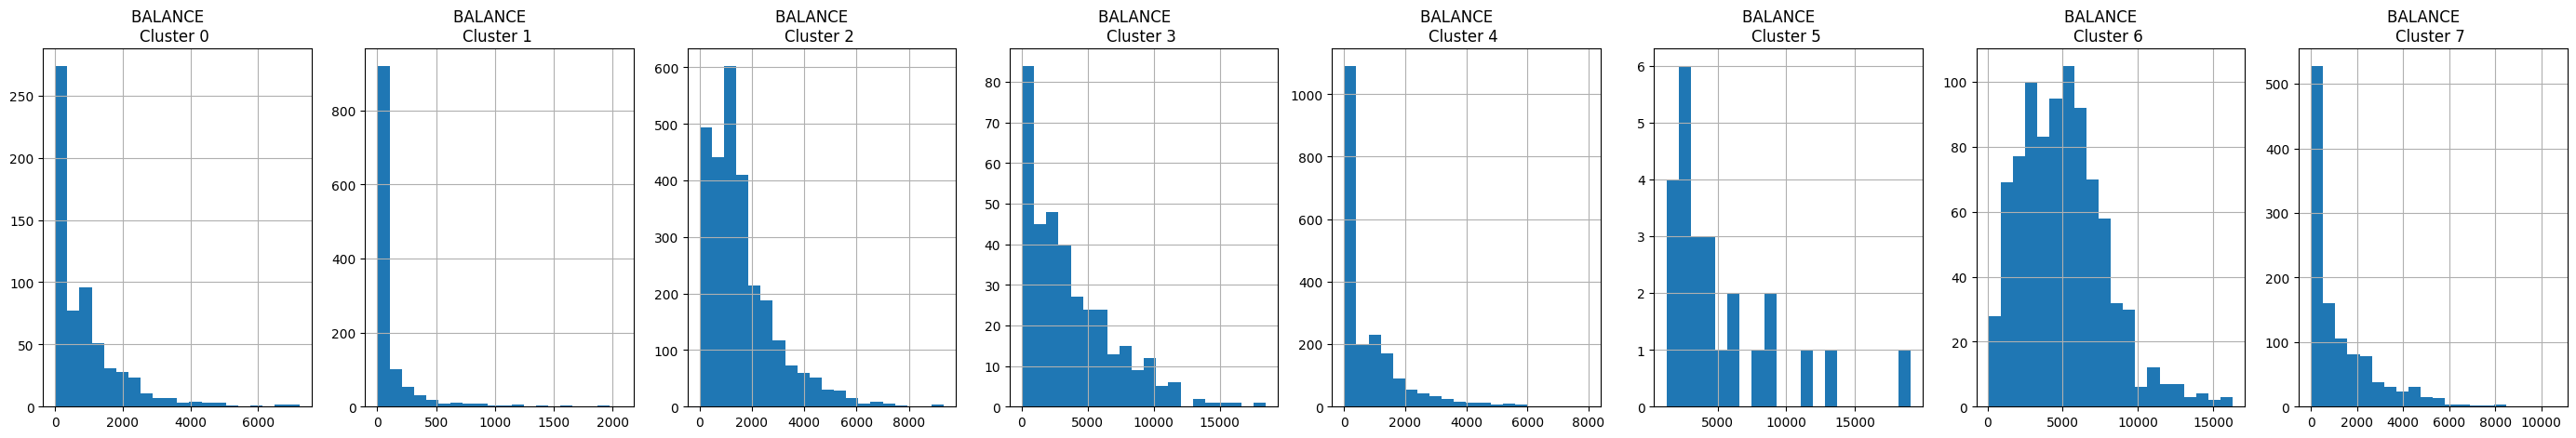

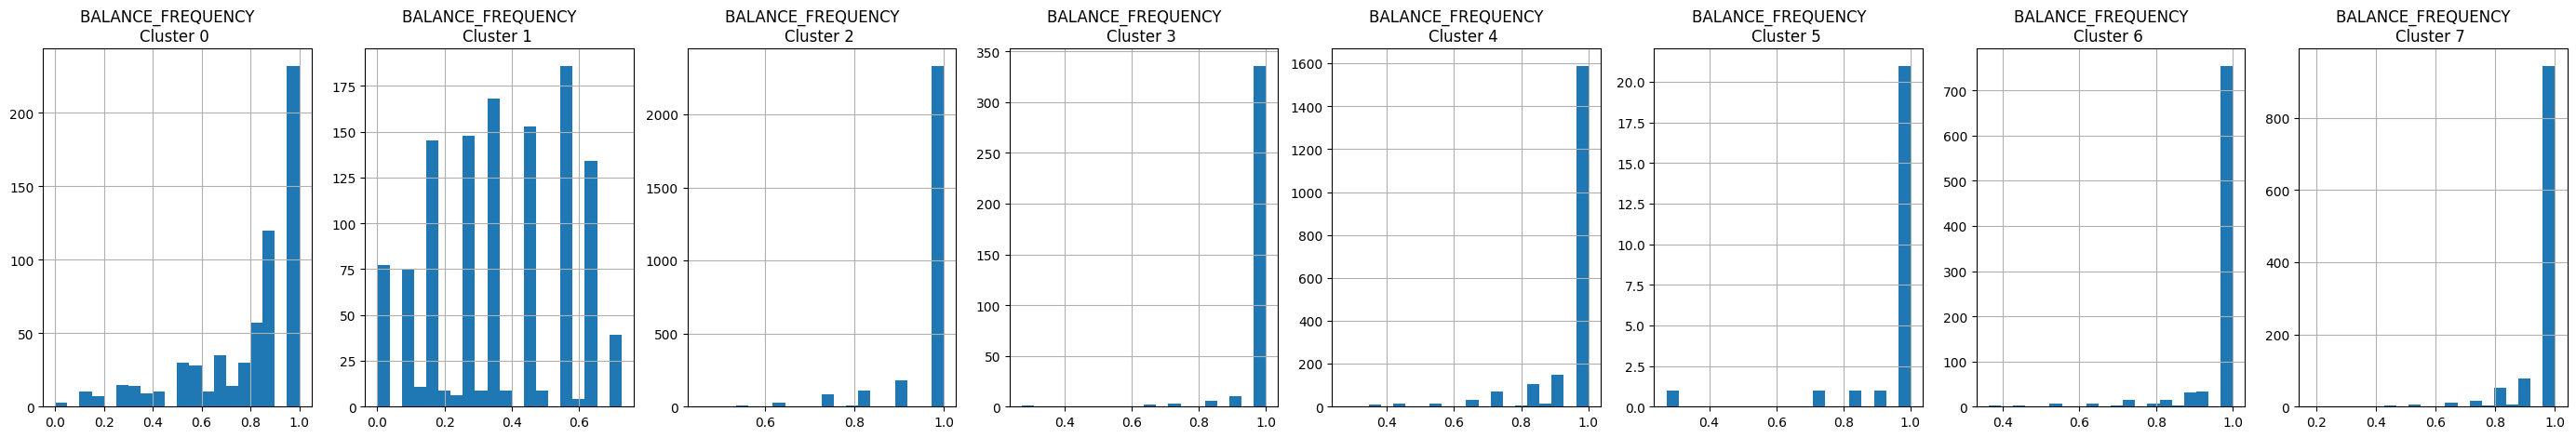

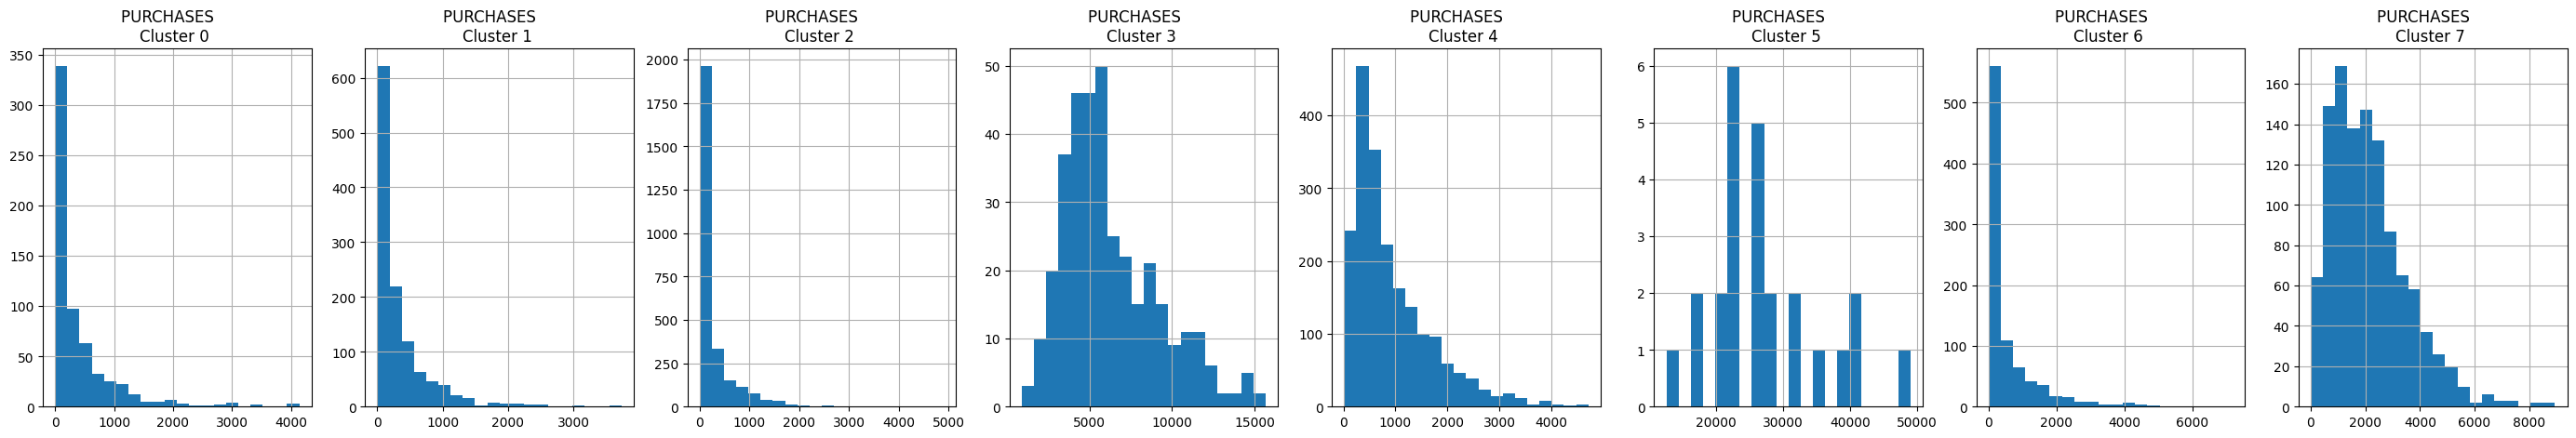

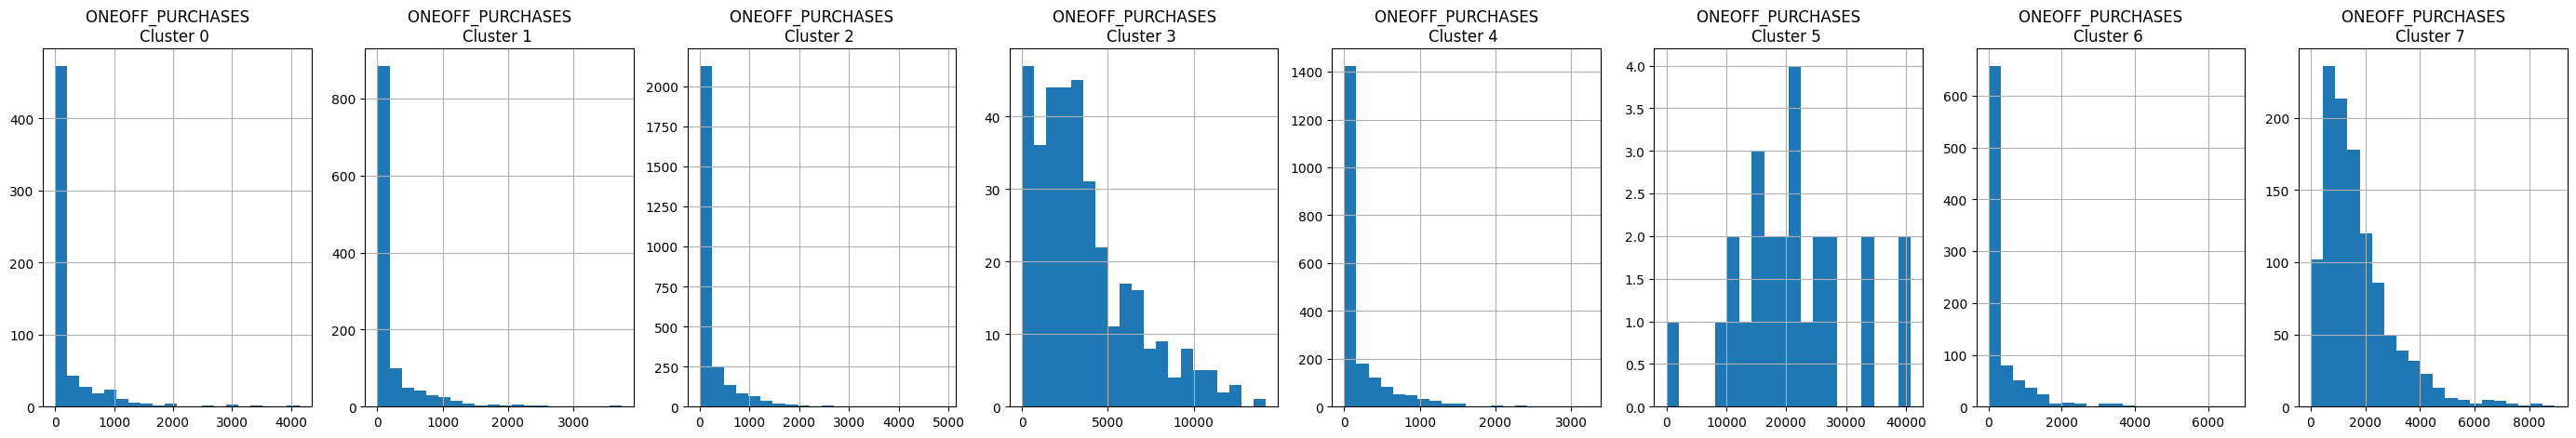

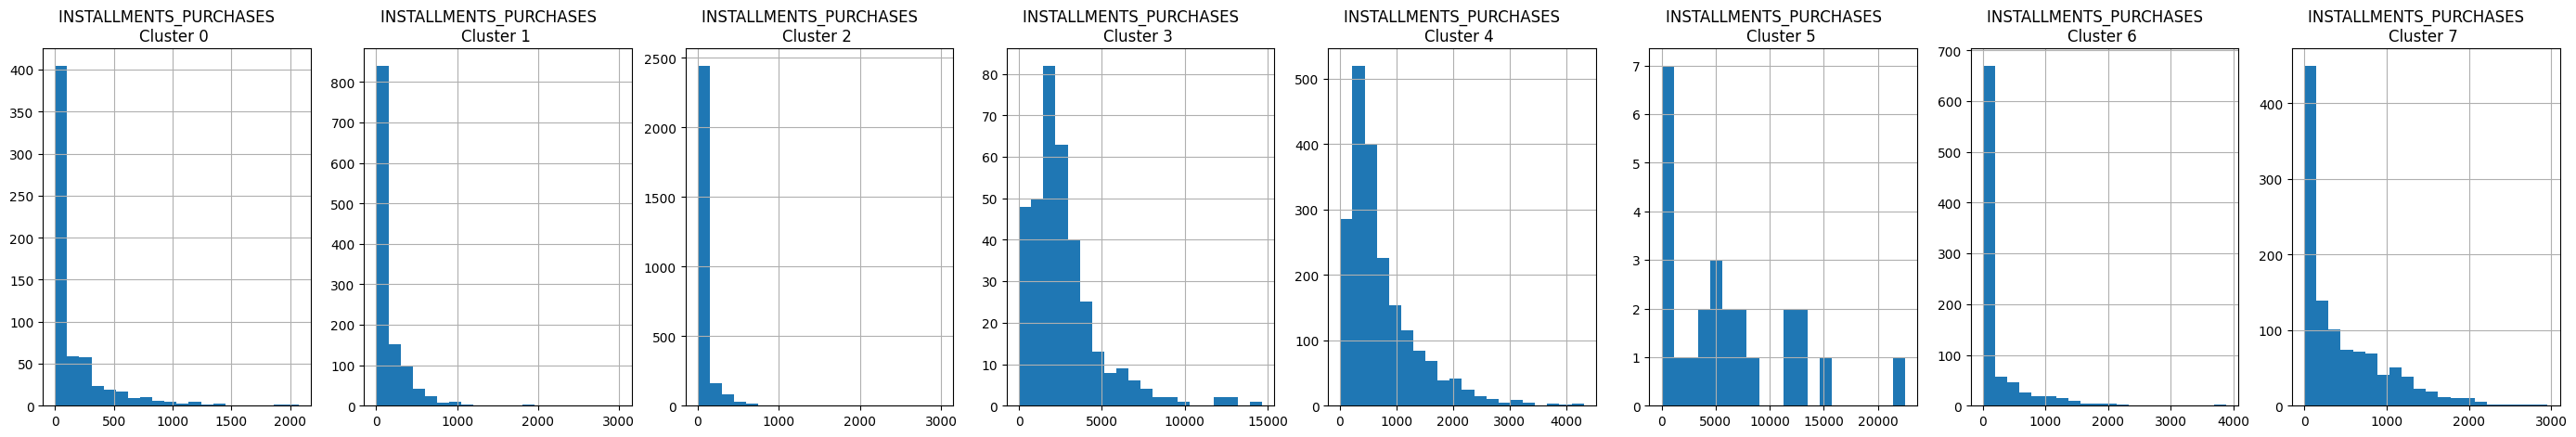

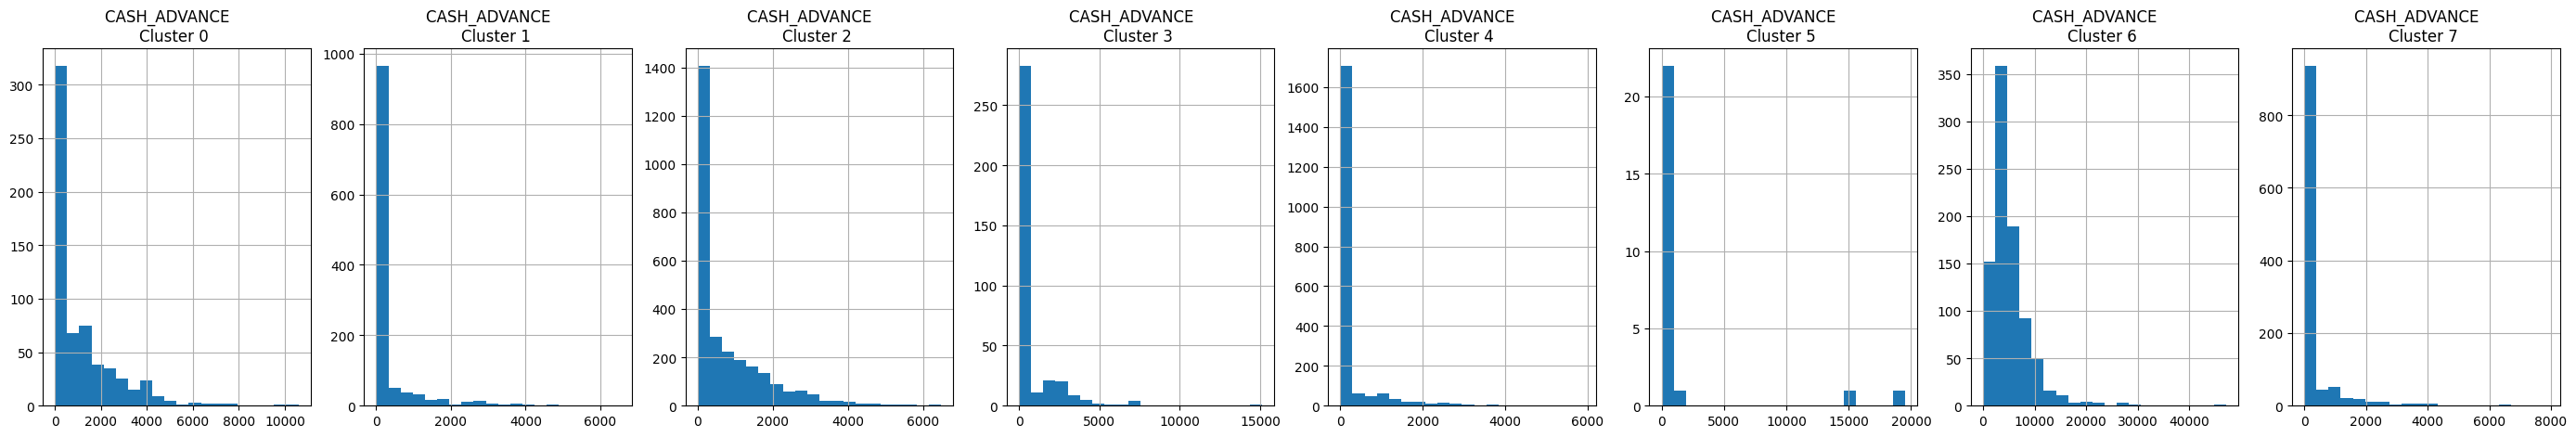

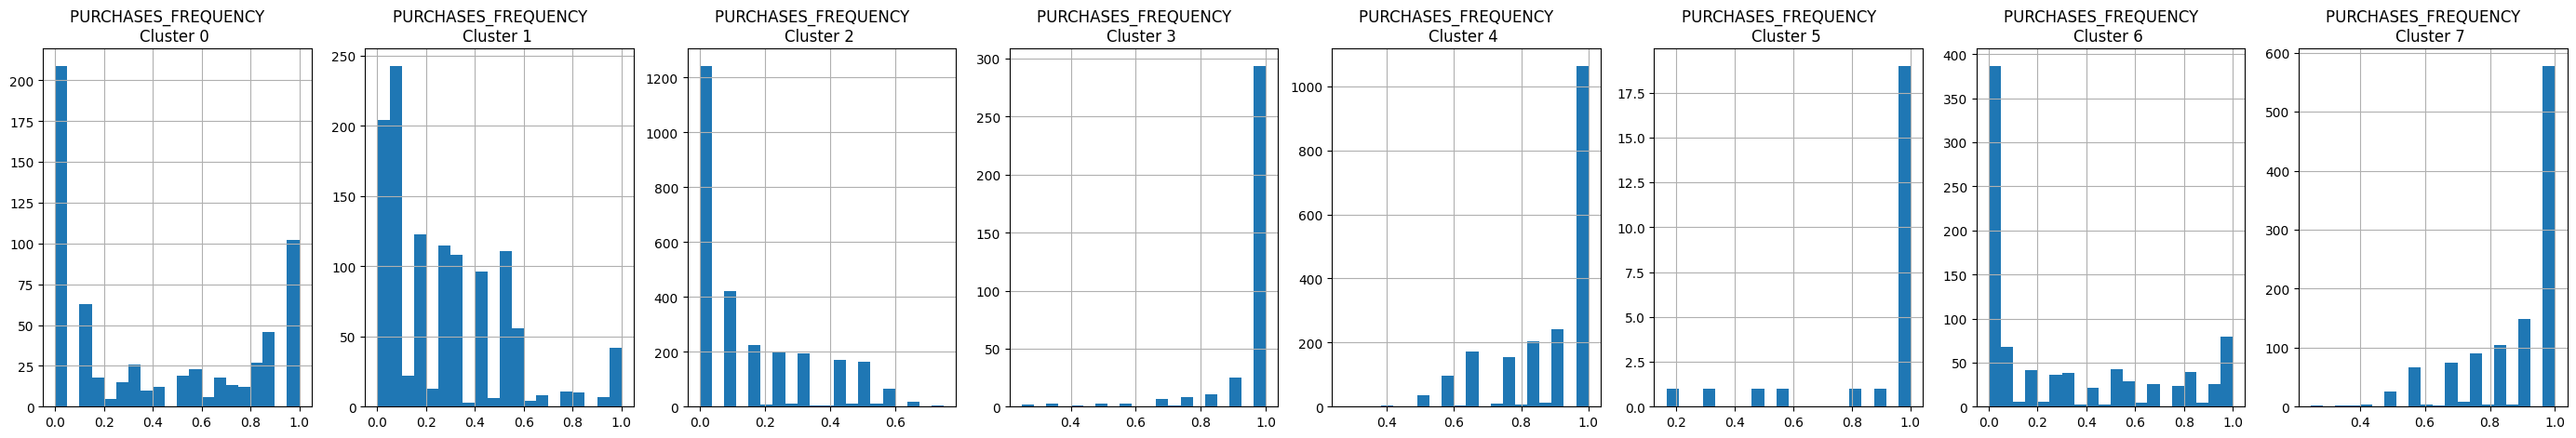

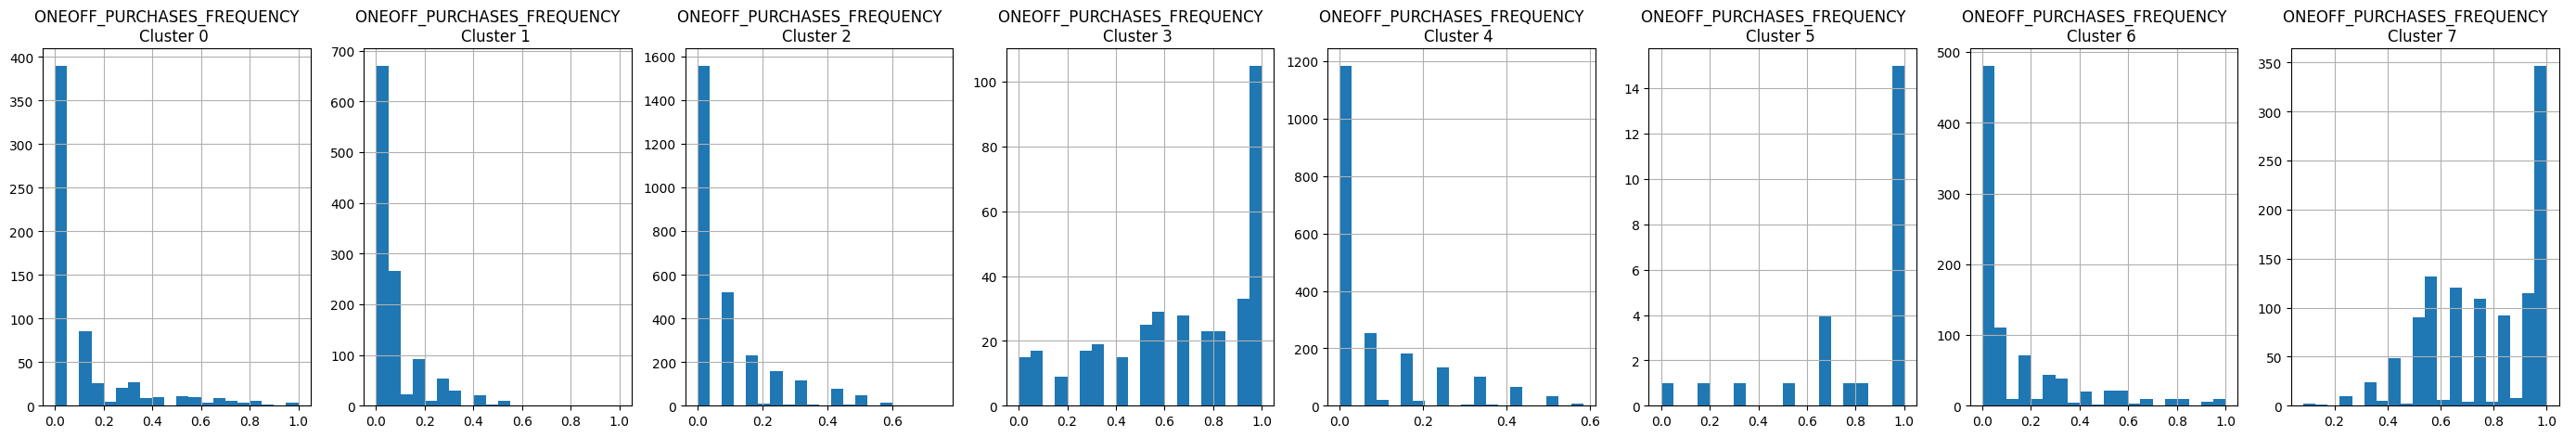

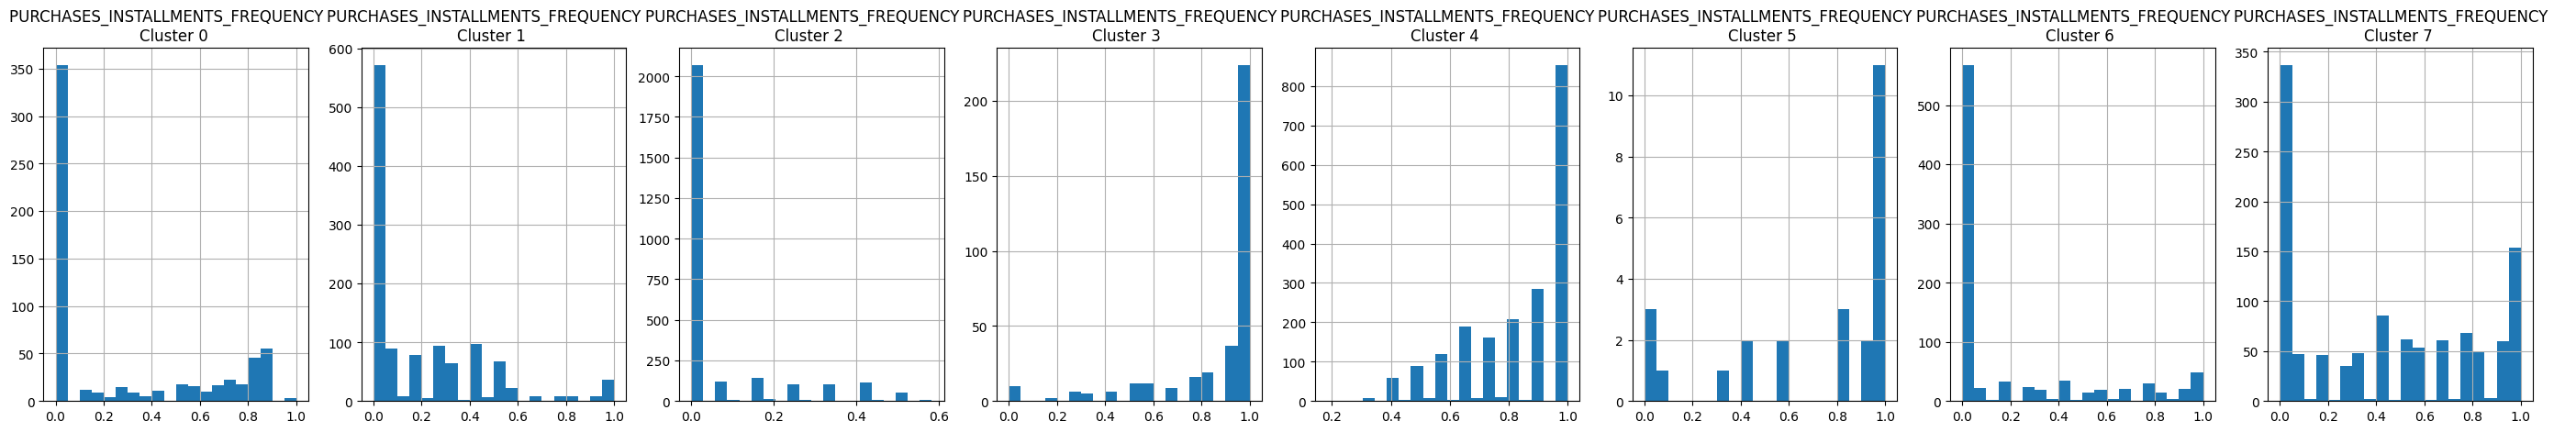

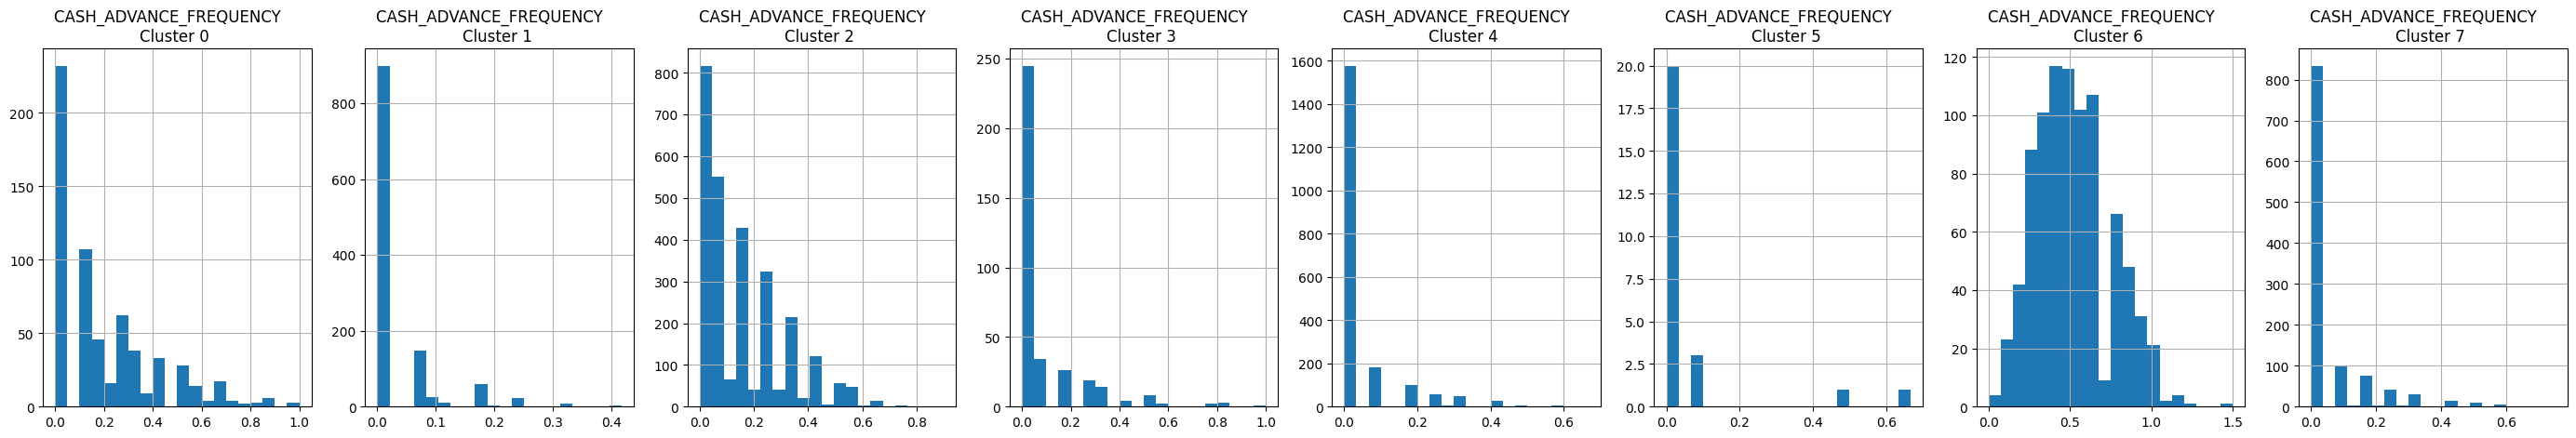

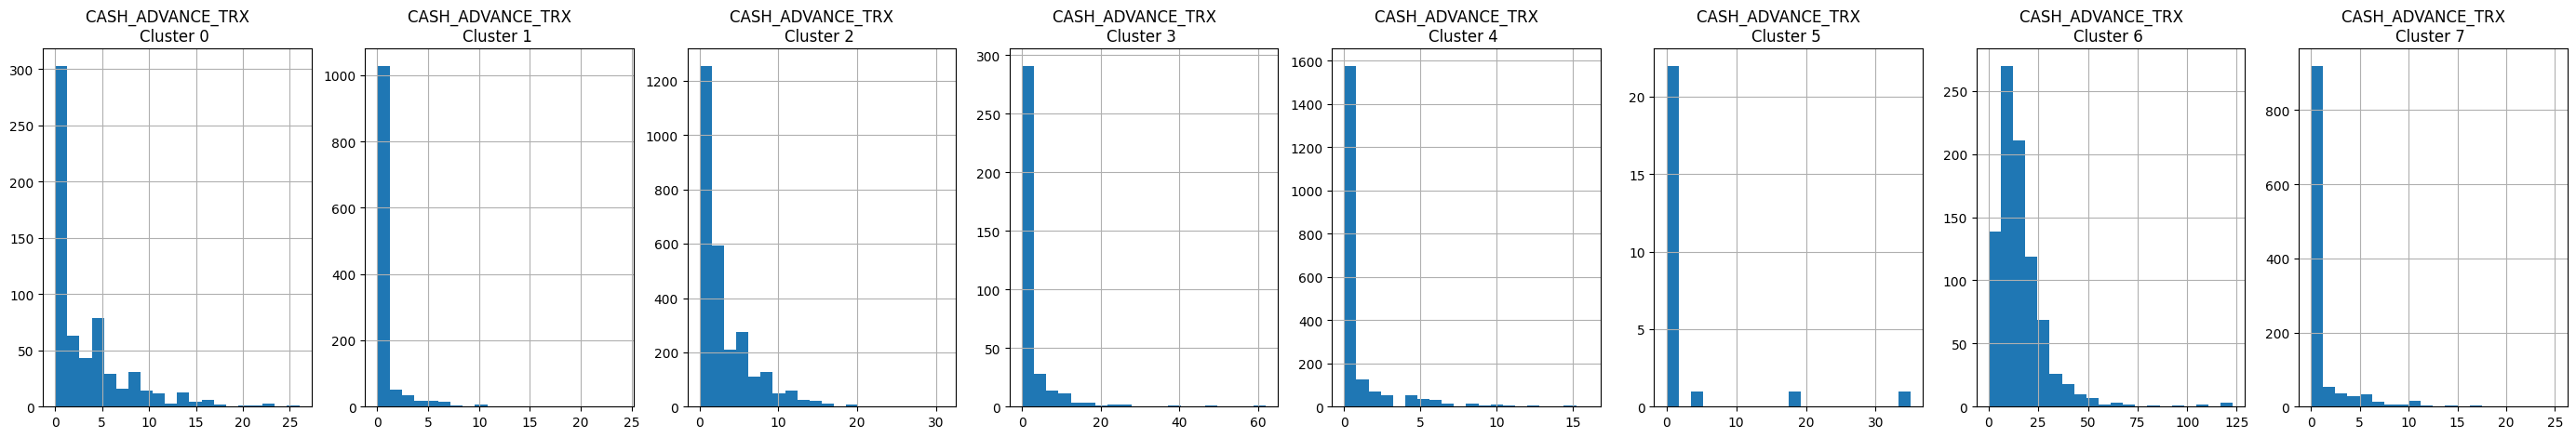

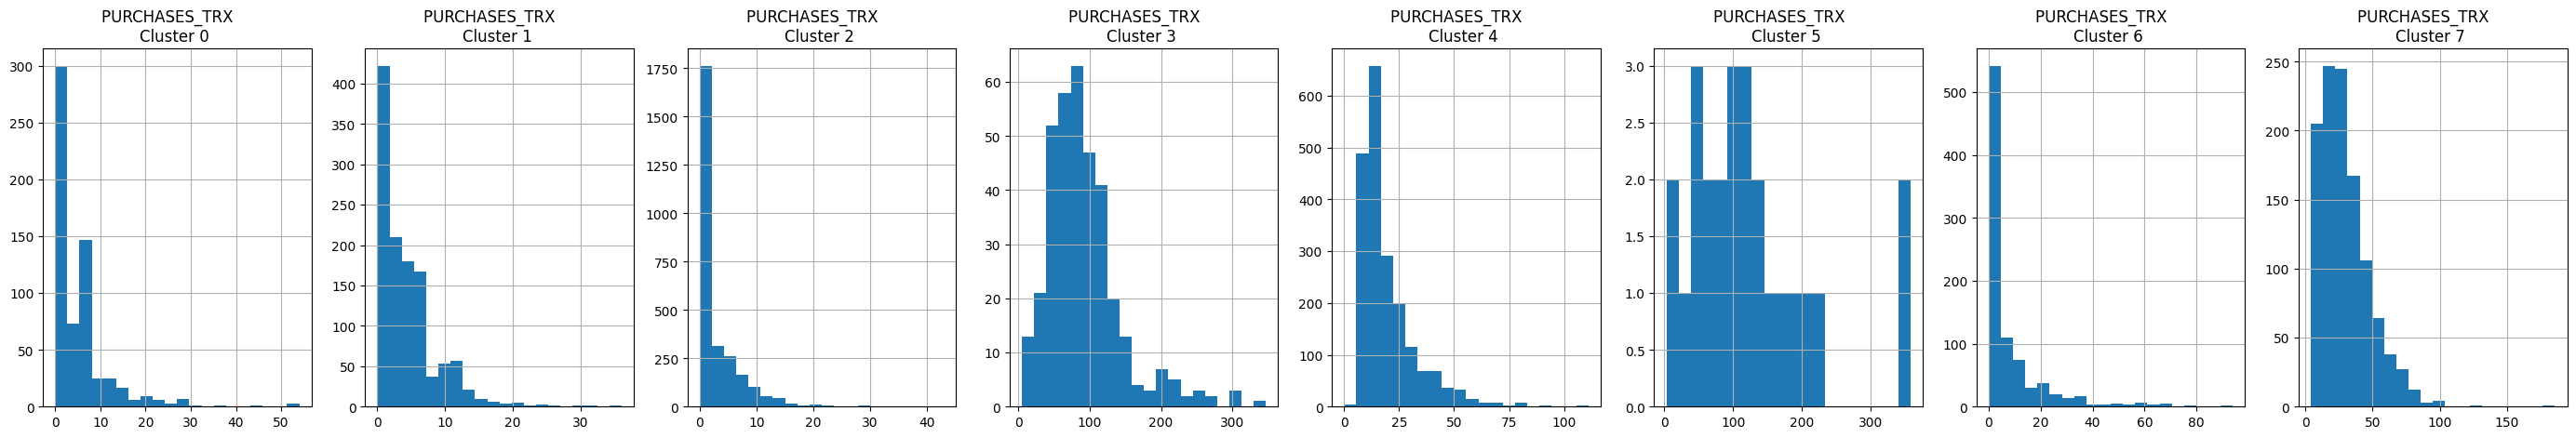

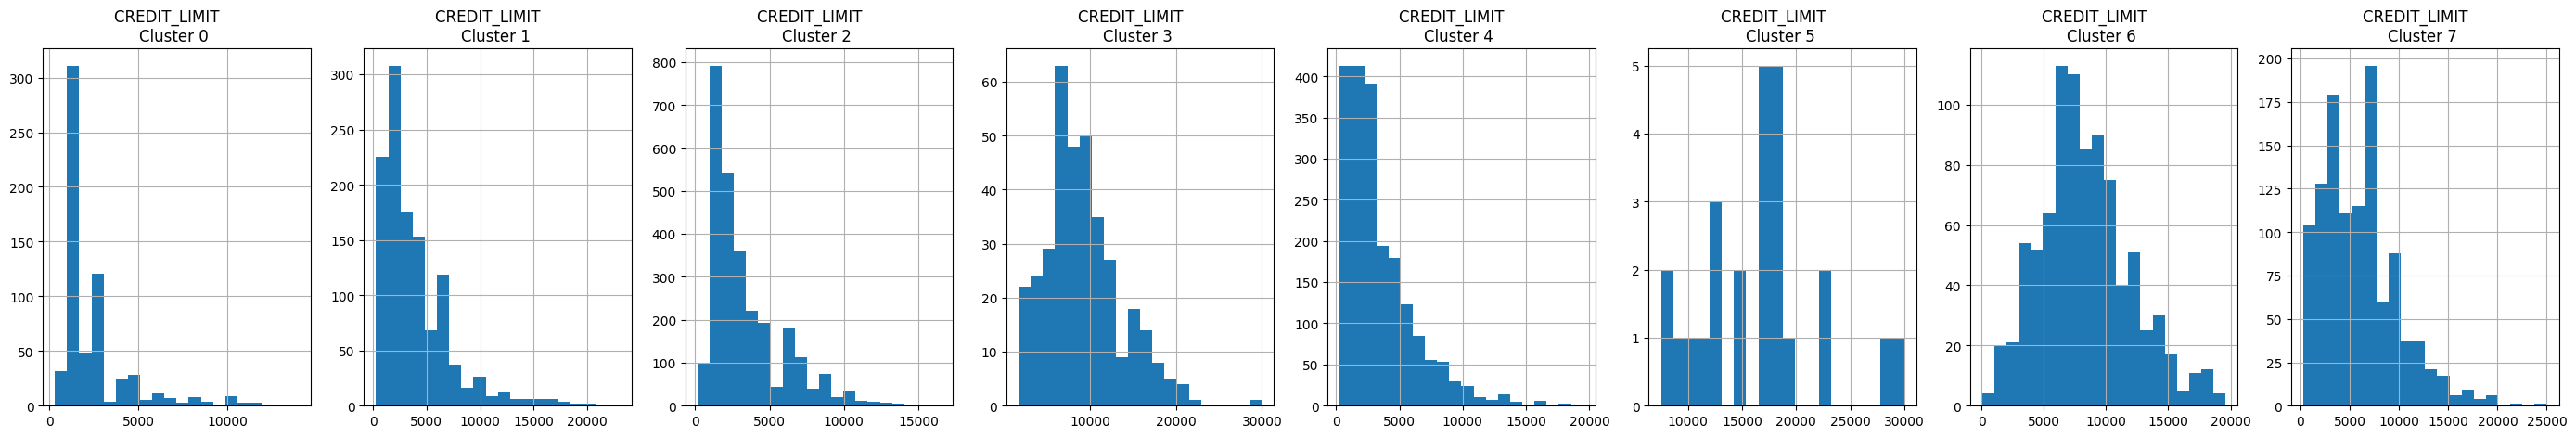

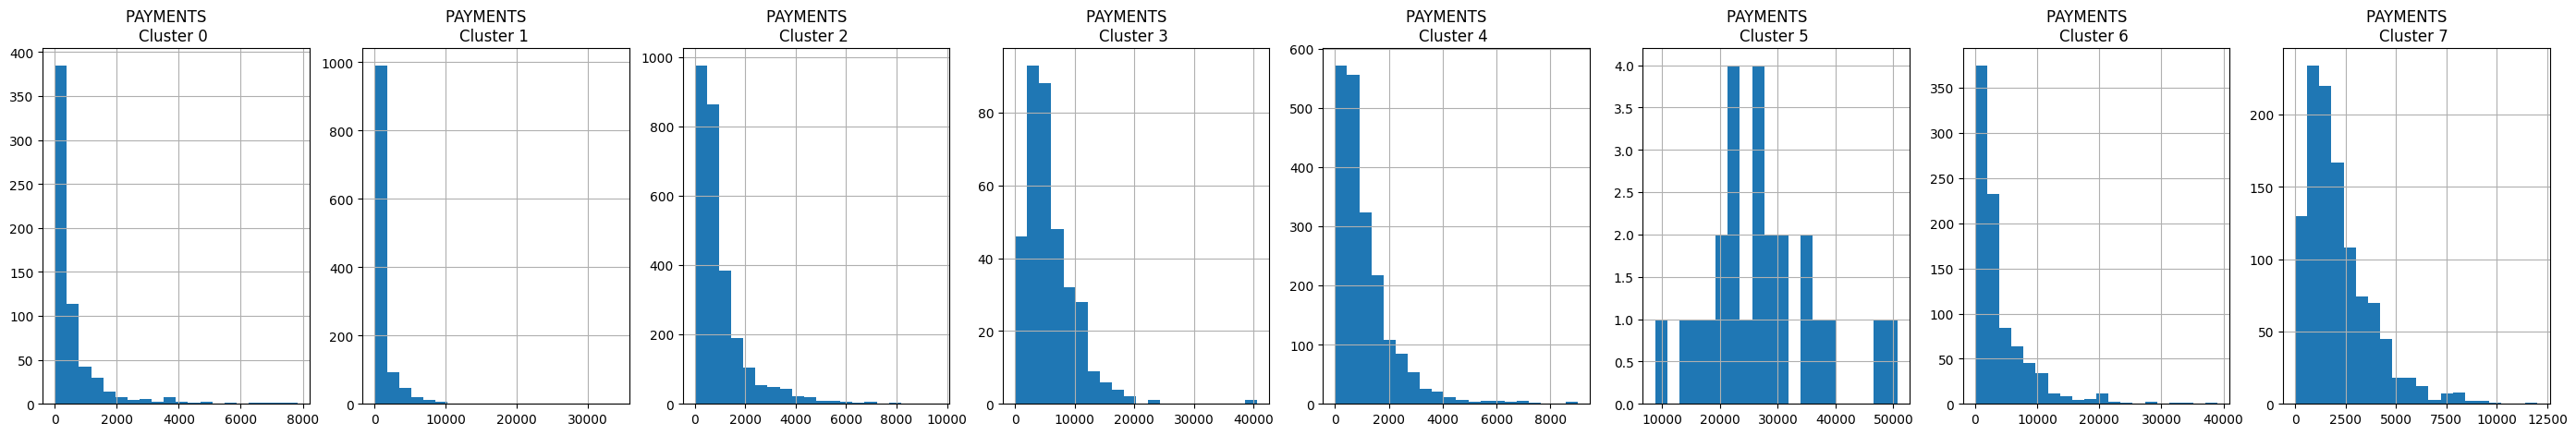

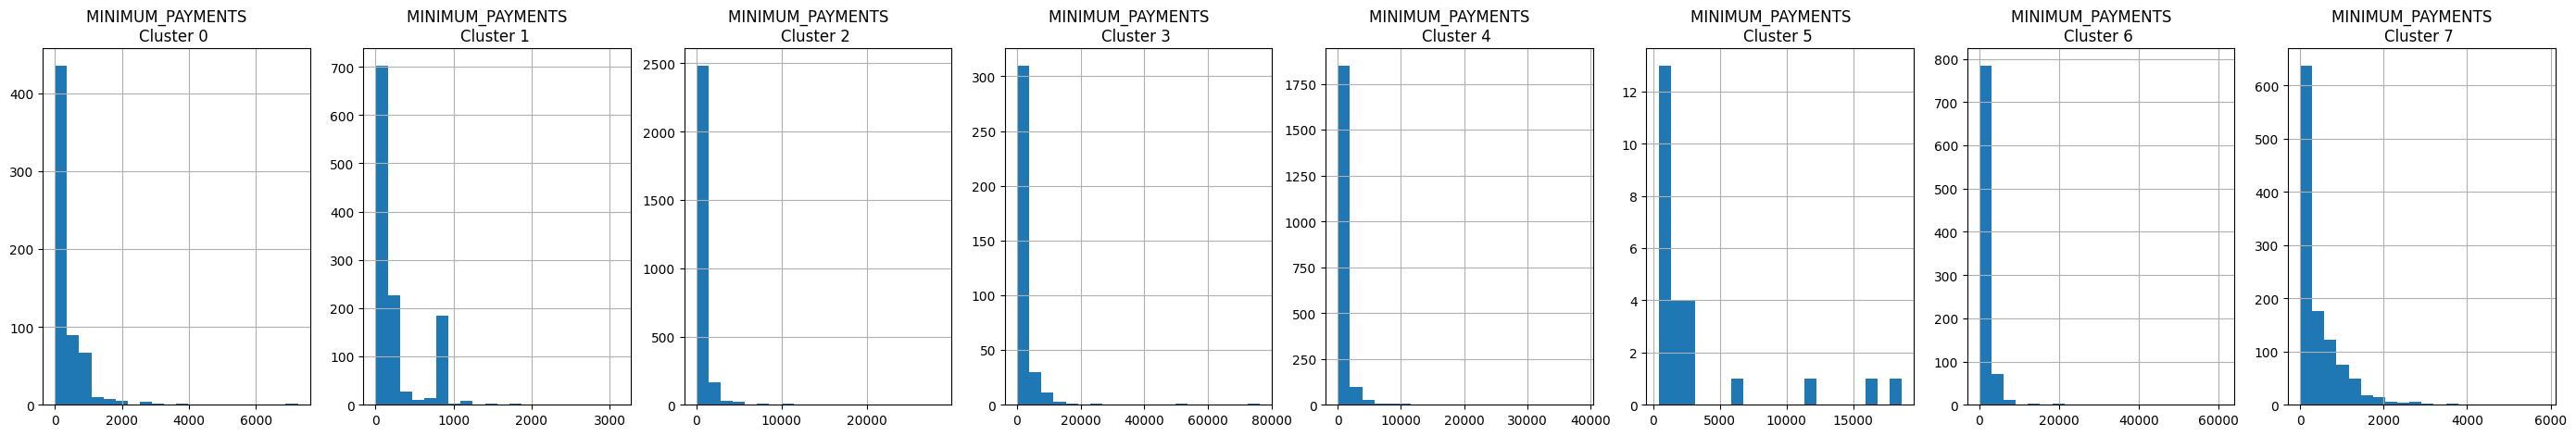

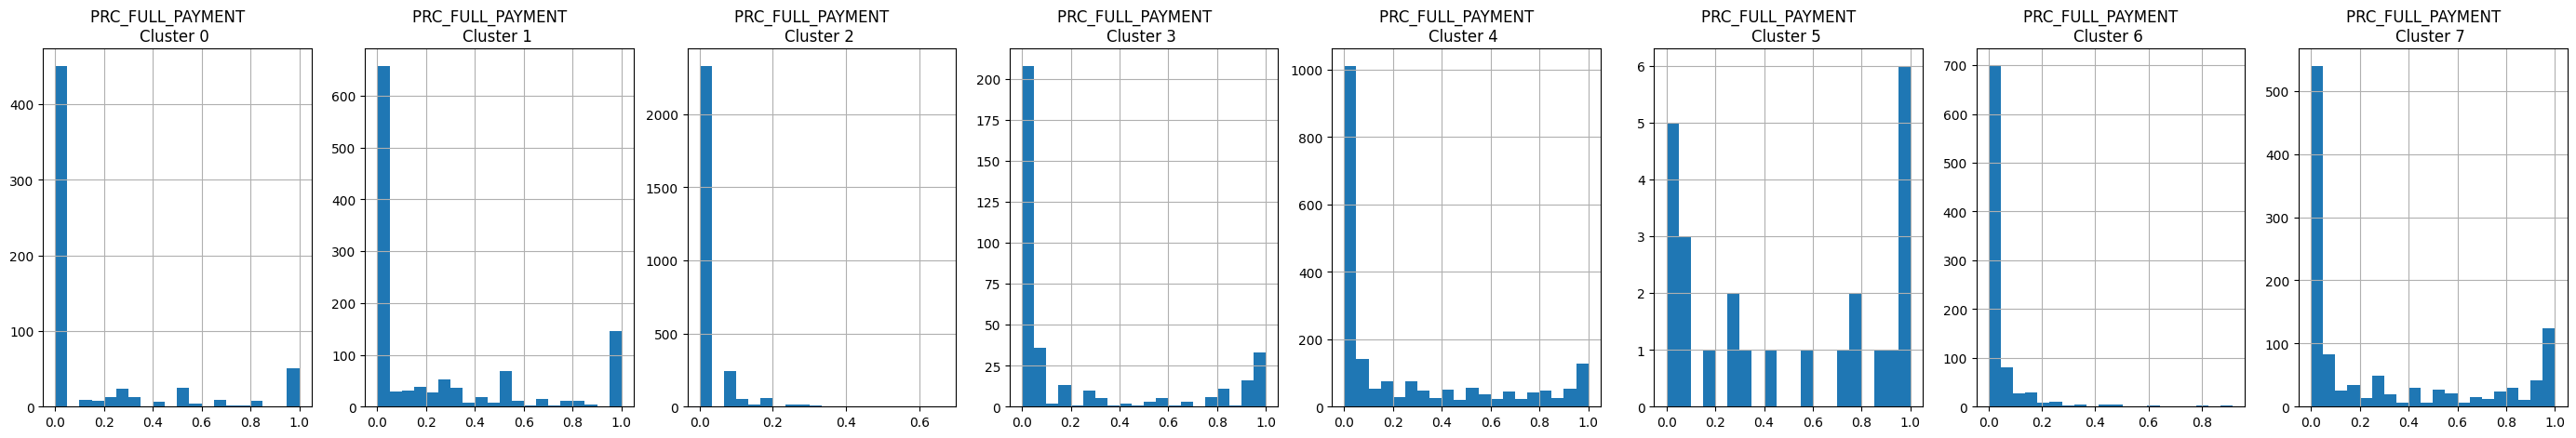

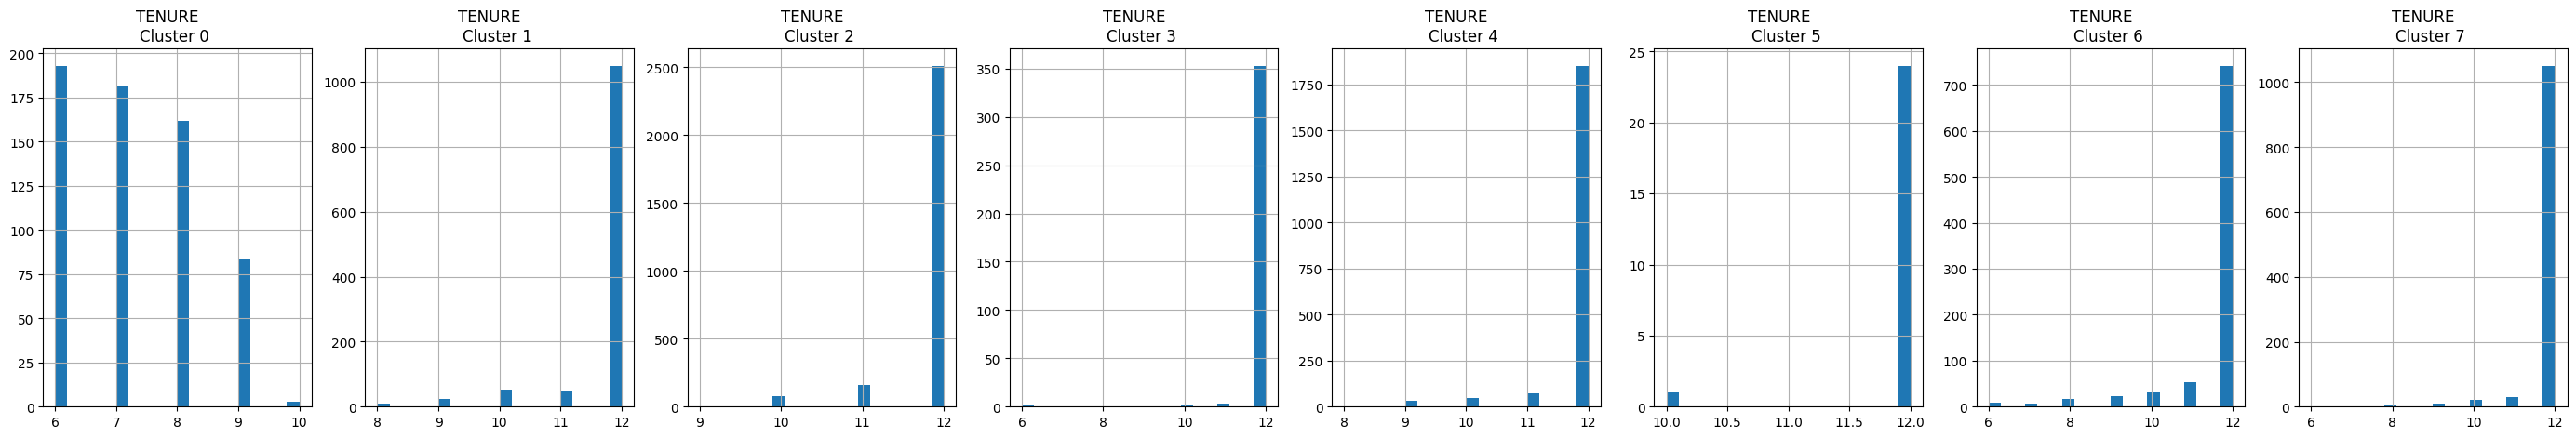

In [ ]:
# Histogram for each column and cluster for better understanding.
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

# Principal Components Analysis (PCA)

In [ ]:
# Principal components. Coordinates for each value.
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222075, -1.07645101],
       [-1.13829886,  2.50647851],
       [ 0.96968359, -0.38351311],
       ...,
       [-0.92620253, -1.81078608],
       [-2.33654946, -0.65797041],
       [-0.55642056, -0.40046728]])

In [ ]:
# Dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138299,2.506479
2,0.969684,-0.383513
3,-0.873629,0.043161
4,-1.599434,-0.688579


In [ ]:
pca_df.shape
# Coordenates for each value.

(8950, 2)

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076451,2
1,-1.138299,2.506479,6
2,0.969684,-0.383513,7
3,-0.873629,0.043161,2
4,-1.599434,-0.688579,2


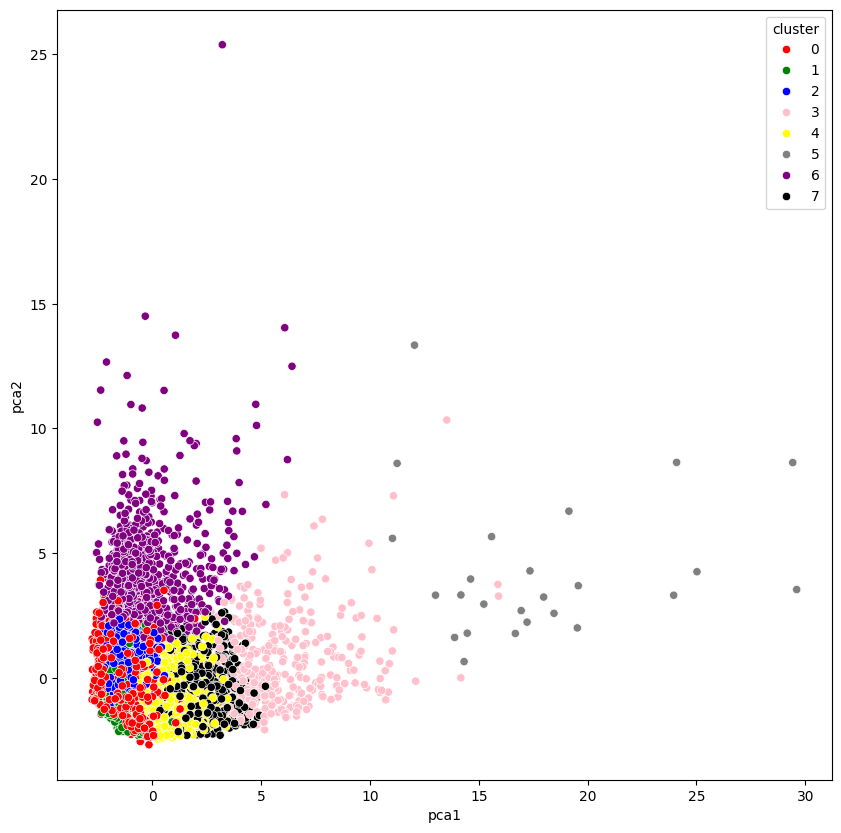

In [ ]:
# Chart for visualize each cluster
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# Dimesionality Reduction Using Autoencoders

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - for reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.7419
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.2998
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.2322
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.1918
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.1731
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.1663
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.1360
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1231
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.1192
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1101
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0994
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.1003
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0932
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0956
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0911
Epoc

In [ ]:
autoencoder.save_weights('autoencoder.weights.h5')

In [ ]:
# Predictions for the original dataset (scaled)
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
pred.shape

(8950, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

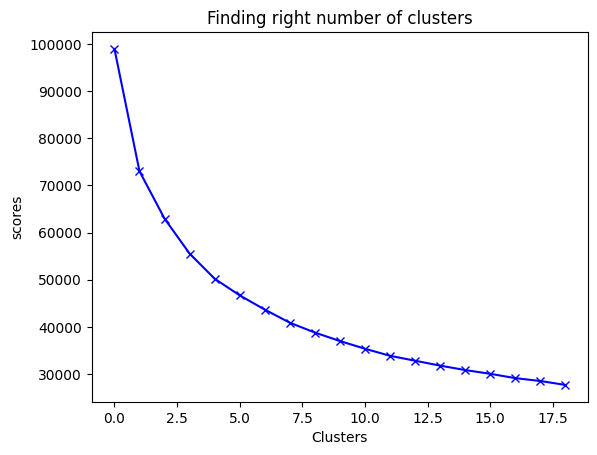

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)
# Determine how efficient is each quantity of clusters en the model.

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

<ipython-input-51-a03cdc235775>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-51-a03cdc235775>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


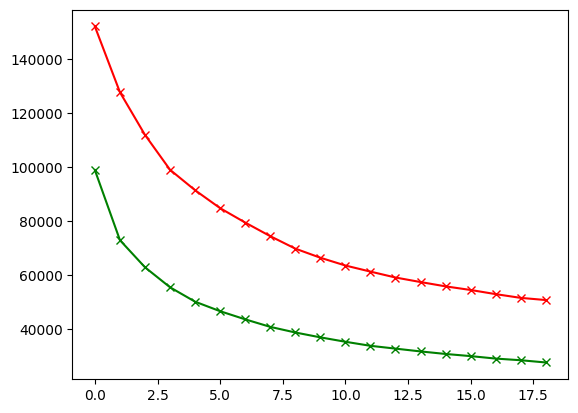

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [ ]:
# With reduction of data dimensionality is definitely more efficient.
# Let's choose 4 clusters now.

# Final Model

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.090303,-0.164901
1,1.851576,1.216949
2,1.979169,-0.117564
3,0.272079,-0.085722
4,-1.853810,0.103947


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.090303,-0.164901,0
1,1.851576,1.216949,1
2,1.979169,-0.117564,3
3,0.272079,-0.085722,0
4,-1.853810,0.103947,0


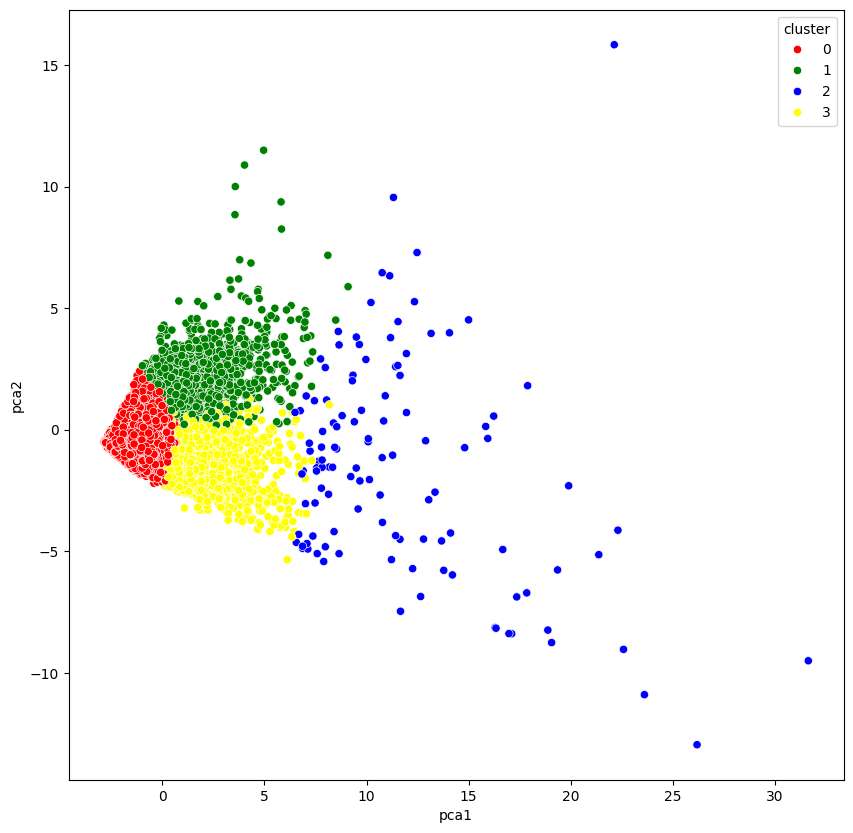

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()